# Load data

In [1]:
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.Series()
df['raw'] = pd.read_csv('./data/movie_metadata.csv')
df['raw'].head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


# Pre processing

In [3]:
print('Amount of lines containing N/A:\t\t{}'.format(df['raw'].isnull().values.sum()))
print('Percent of lines containing N/A:\t{:.2f}%'.format(100*df['raw'].isnull().values.sum()/df['raw'].shape[0]))

Amount of lines containing N/A:		2698
Percent of lines containing N/A:	53.50%


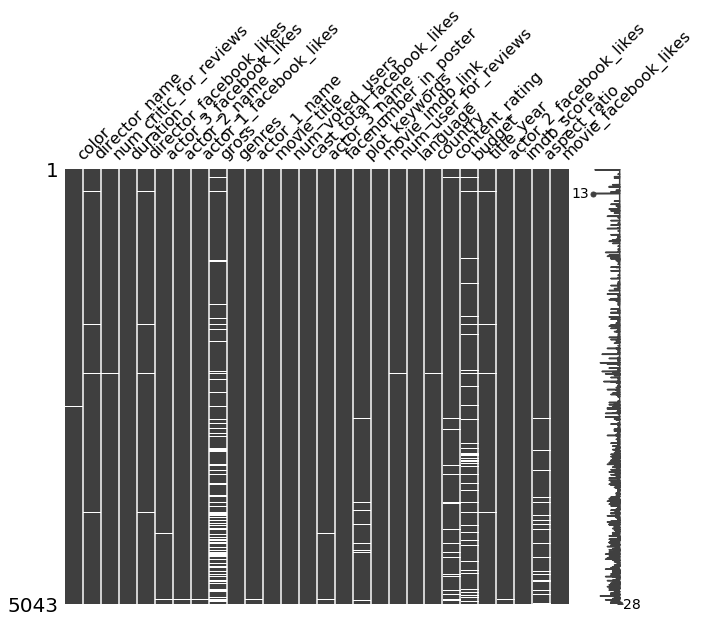

In [4]:
msno.matrix(df['raw'],figsize=(10,8))

The N/A mostly lies in the actor 1 facebook likes column and the budget column.  
The approach will be to investigate the result of just removing lines, and the result when the 2  columns mentioned above is removed before the N/A lines are removed.  
Also the link to imdb should be removed.

In [5]:
del df['raw']['movie_imdb_link']
del df['raw']['movie_title']
df['no_na_row'] = df['raw'].dropna()
df['no_na_col'] = pd.DataFrame.copy(df['raw'])
del df['no_na_col']['budget']

#Removing actor 1 facebook likes turn out to help very little.
#del df['no_na_col']['actor_1_facebook_likes']del df['no_na_col']['budget']del df['no_na_col']['budget']del df['no_na_col']['budget']


print('Before columns are removed')
print('Amount of lines containing N/A:\t\t{}'.format(df['raw'].isnull().values.sum()))
print('Percent of lines containing N/A:\t{:.2f}%'.format(100*df['raw'].isnull().values.sum()/df['raw'].shape[0]))
print('\nAfter columns are removed')
print('Amount of lines containing N/A:\t\t{}'.format(df['no_na_col'].isnull().values.sum()))
print('Percent of lines containing N/A:\t{:.2f}%'.format(100*df['no_na_col'].isnull().values.sum()/df['no_na_col'].shape[0]))

df['no_na_col'] = df['no_na_col'].dropna()

Before columns are removed
Amount of lines containing N/A:		2698
Percent of lines containing N/A:	53.50%

After columns are removed
Amount of lines containing N/A:		2206
Percent of lines containing N/A:	43.74%


Now the data is cleaned, the text features should be k-coded

In [6]:
#find all numeric column labels
numeric_columns = df['no_na_row'].select_dtypes(include=[np.number]).columns.tolist()

#standardize each column
for column in numeric_columns:
    df['no_na_row'][column] = ((df['no_na_row'][column]-df['no_na_row'][column].mean())/df['no_na_row'][column].std())


numeric_columns = df['no_na_col'].select_dtypes(include=[np.number]).columns.tolist()
for column in numeric_columns:
    df['no_na_col'][column] = ((df['no_na_col'][column]-df['no_na_col'][column].mean())/df['no_na_col'][column].std())



C:\Users\bok\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [7]:
df['no_na_row'].loc[3]

color                                                                    Color
director_name                                                Christopher Nolan
num_critic_for_reviews                                                 5.22974
duration                                                               2.37306
director_facebook_likes                                                6.90726
actor_3_facebook_likes                                                 11.7348
actor_2_name                                                    Christian Bale
actor_1_facebook_likes                                                  1.2403
gross                                                                  5.62471
genres                                                         Action|Thriller
actor_1_name                                                         Tom Hardy
num_voted_users                                                        6.83071
cast_total_facebook_likes                           

Removed columns:  
IMDB_link  
movie_title 


In [8]:
df['no_na_row']['color'].value_counts().head()

Color               3632
 Black and White     124
Name: color, dtype: int64

In [9]:
#Maps atribute color as one hot notation 
d = {'Color': 1, ' Black and White': 0}
df['no_na_col']['color'] = df['no_na_col']['color'].map(d)
df['no_na_row']['color'] = df['no_na_row']['color'].map(d)
df['no_na_col'] = df['no_na_col'].loc[: , ~df['no_na_col'].columns.duplicated()]
df['no_na_row'] = df['no_na_row'].loc[: , ~df['no_na_row'].columns.duplicated()]

#Maps single column in one hot notation
df['no_na_row'] = pd.concat([df['no_na_row'],df['no_na_row']['language'].str.get_dummies()],axis=1)
df['no_na_row'] = pd.concat([df['no_na_row'],df['no_na_row']['country'].str.get_dummies()],axis=1)
df['no_na_row'] = pd.concat([df['no_na_row'],df['no_na_row']['content_rating'].str.get_dummies()],axis=1)
df['no_na_col'] = pd.concat([df['no_na_col'],df['no_na_col']['language'].str.get_dummies()],axis=1)
df['no_na_col'] = pd.concat([df['no_na_col'],df['no_na_col']['country'].str.get_dummies()],axis=1)
df['no_na_col'] = pd.concat([df['no_na_col'],df['no_na_col']['content_rating'].str.get_dummies()],axis=1)

#Maps multiword attribute to one hot notation
df['no_na_row'] = pd.concat([df['no_na_row'], df['no_na_row']['plot_keywords'].str.get_dummies(sep='|')],axis=1)
df['no_na_row'] = pd.concat([df['no_na_row'], df['no_na_row']['genres'].str.get_dummies(sep='|')],axis=1)
df['no_na_col'] = pd.concat([df['no_na_col'], df['no_na_col']['plot_keywords'].str.get_dummies(sep='|')],axis=1)
df['no_na_col'] = pd.concat([df['no_na_col'], df['no_na_col']['genres'].str.get_dummies(sep='|')],axis=1)

#Maps multiple columns (actor 1,2,3) into "was he in the movie" one hot notation
df['no_na_row'] = pd.concat([df['no_na_row'],df['no_na_row']['actor_2_name'].map(str).str.cat(df['no_na_row']['actor_1_name'].map(str),sep='|').str.cat(df['no_na_row']['actor_3_name'].map(str),sep='|').str.get_dummies(sep='|')],axis=1)
df['no_na_col'] = pd.concat([df['no_na_col'],df['no_na_col']['actor_2_name'].map(str).str.cat(df['no_na_col']['actor_1_name'].map(str),sep='|').str.cat(df['no_na_col']['actor_3_name'].map(str),sep='|').str.get_dummies(sep='|')],axis=1)

#clean up
df['no_na_col'] = df['no_na_col'].drop(['genres','plot_keywords','actor_1_name','actor_2_name','actor_3_name','language',
                    'country','content_rating' ],axis=1)
df['no_na_row'] = df['no_na_row'].drop(['genres','plot_keywords','actor_1_name','actor_2_name','actor_3_name','language',
                    'country','content_rating'],axis=1)

C:\Users\bok\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


For clustering, a version is made with a column "is steven spielberg director", and for the regression, a one hut of the directors are made.

In [10]:
#copy the dataframe to two new dataframes
df['c_no_na_row'] = pd.DataFrame.copy(df['no_na_row'])
df['c_no_na_col'] = pd.DataFrame.copy(df['no_na_col'])


#onehut of the director name for the row versions
df['c_no_na_row']['SS_director'] = (df['no_na_row']['director_name'].str.contains('Steven Spielberg', na=0))
df['r_no_na_row'] = pd.concat([df['no_na_row'], pd.get_dummies(df['no_na_row']['director_name'],prefix='Director_')], axis=1)

#onehot of the director for the column versions
df['c_no_na_col']['SS_director']=(df['no_na_col']['director_name'].str.contains('Steven Spielberg', na=0))
df['r_no_na_col'] = pd.concat([df['no_na_col'], pd.get_dummies(df['no_na_col']['director_name'],prefix='Direcor_')], axis=1)

#change false/true to 0/1
df['c_no_na_col']['SS_director'] = df['c_no_na_col']['SS_director'].astype(int)
df['c_no_na_row']['SS_director'] = df['c_no_na_row']['SS_director'].astype(int)

# drop column director name
del df['r_no_na_col']['director_name']
del df['c_no_na_col']['director_name']
del df['r_no_na_row']['director_name']
del df['c_no_na_row']['director_name']

# delete duplicate coler row
df['r_no_na_col'] = df['r_no_na_col'].loc[: , ~df['r_no_na_col'].columns.duplicated()]
df['r_no_na_row'] = df['r_no_na_row'].loc[: , ~df['r_no_na_row'].columns.duplicated()]


Steven Spielberg is the director which occours most frequently in the dataset. It will be the focus to for the clustering, to cluster whether or not he directed the movie. There will be created 2 datasets, one for clustering and one for the regression part. One dataset will consist of a 

In [11]:
df['c_no_na_col'].shape

(3975, 11777)

In [12]:
df['c_no_na_col'].isnull().values.sum()

0

# Regression

## Problem formulation
Describe the problem you want to solve.

## Apply linear regression with forward selection
Is transforming or combining attributes useful?
- It can be useful to plot the residual error vs. the attribute.

## Explain how a new observation is predicted
- Normalize

## Neural network model fitting

## Performance evalutation
Neural network vs. linear regression
- Use a paired t-test as described in lesson 6

# Classification

## Problem formulation
For the classification, we will try to clasify wether steven spielberg was the director of the movie, or not.  
The following three methods will be used for this:
Decision Trees, K-Nearest Neighbors (KNN), Artificial Neural Networks (ANN).



## Apply three of the given methods
Two level cross validation


### Decision trees

In [52]:
df['r_no_na_col'].isnull().values.sum()

0

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['c_no_na_col'].iloc[:, df['c_no_na_col'].columns != 'SS_director'],
                                                    df['c_no_na_col']['SS_director'], 
                                                    test_size=0.25)

In [16]:
from sklearn import tree

# set X and y values
#X = pd.DataFrame([[0, 0], [1, 1]])
#Y = pd.DataFrame(df['c_no_na_col'].shape)

# clasify
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

#predict
y_pred = clf.predict(X_test)


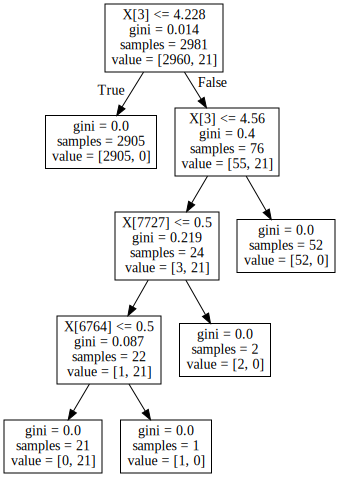

In [17]:
import graphviz 

# makes a graphical version of the decision tree
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data)

# show in output
graph


#export as PDF (iris.pdf)
#graph.render("iris")

In [18]:
import collections

print('Prediction:',collections.Counter(y_pred))
print('Test data:',collections.Counter(y_test))

Prediction: Counter({0: 989, 1: 5})
Test data: Counter({0: 990, 1: 4})


### KNN

In [19]:
from sklearn.neighbors import KNeighborsClassifier

# set x and y values
#X = pd.DataFrame([[0], [1], [2], [3]])
#y = pd.Series([0, 0, 1, 1])

# clasify
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train) 

# predict
y_pred = neigh.predict(X_test)


In [20]:
print('Prediction:',collections.Counter(y_pred))
print('Test data:',collections.Counter(y_test))

Prediction: Counter({0: 985, 1: 9})
Test data: Counter({0: 990, 1: 4})


### Nerual Network

In [47]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import optimizers

# creating model object
model = Sequential()

# adding layers
model.add(Dense(100, activation='relu', input_dim=X_train.shape[1],))
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# tweaking settings
adam = optimizers.Adam(lr=0.001, beta_1=0.9,
beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

# fitting model
history = model.fit(X_train.values,y_train.values, validation_data=(X_test.values,y_test.values),
epochs = 80, batch_size=100, shuffle=False)
y_pred = model.predict(X_test.values, batch_size = 1000)

Train on 2981 samples, validate on 994 samples
Epoch 1/80
2981/2981 [==============================] - 0s - loss: 0.3983 - acc: 0.9400 - val_loss: 0.0620 - val_acc: 0.9960
Epoch 2/80
2981/2981 [==============================] - 0s - loss: 0.0301 - acc: 0.9930 - val_loss: 0.0150 - val_acc: 0.9960
Epoch 3/80
2981/2981 [==============================] - 0s - loss: 0.0133 - acc: 0.9930 - val_loss: 0.0135 - val_acc: 0.9960
Epoch 4/80
2981/2981 [==============================] - 0s - loss: 0.0091 - acc: 0.9930 - val_loss: 0.0125 - val_acc: 0.9960
Epoch 5/80
2981/2981 [==============================] - 0s - loss: 0.0064 - acc: 0.9953 - val_loss: 0.0123 - val_acc: 0.9960
Epoch 6/80
2981/2981 [==============================] - 0s - loss: 0.0045 - acc: 1.0000 - val_loss: 0.0127 - val_acc: 0.9960
Epoch 7/80
2981/2981 [==============================] - 0s - loss: 0.0028 - acc: 1.0000 - val_loss: 0.0127 - val_acc: 0.9950
Epoch 8/80
2981/2981 [==============================] - 0s - loss: 0.0012 - ac

2981/2981 [==============================] - 0s - loss: 2.0544e-06 - acc: 1.0000 - val_loss: 0.0161 - val_acc: 0.9950
Epoch 64/80
2981/2981 [==============================] - 0s - loss: 1.9805e-06 - acc: 1.0000 - val_loss: 0.0161 - val_acc: 0.9950
Epoch 65/80
2981/2981 [==============================] - 0s - loss: 1.9098e-06 - acc: 1.0000 - val_loss: 0.0161 - val_acc: 0.9950
Epoch 66/80
2981/2981 [==============================] - 0s - loss: 1.8430e-06 - acc: 1.0000 - val_loss: 0.0162 - val_acc: 0.9950
Epoch 67/80
2981/2981 [==============================] - 0s - loss: 1.7791e-06 - acc: 1.0000 - val_loss: 0.0162 - val_acc: 0.9950
Epoch 68/80
2981/2981 [==============================] - 0s - loss: 1.7182e-06 - acc: 1.0000 - val_loss: 0.0162 - val_acc: 0.9950
Epoch 69/80
2981/2981 [==============================] - 0s - loss: 1.6602e-06 - acc: 1.0000 - val_loss: 0.0162 - val_acc: 0.9950
Epoch 70/80
2981/2981 [==============================] - 0s - loss: 1.6049e-06 - acc: 1.0000 - val_los

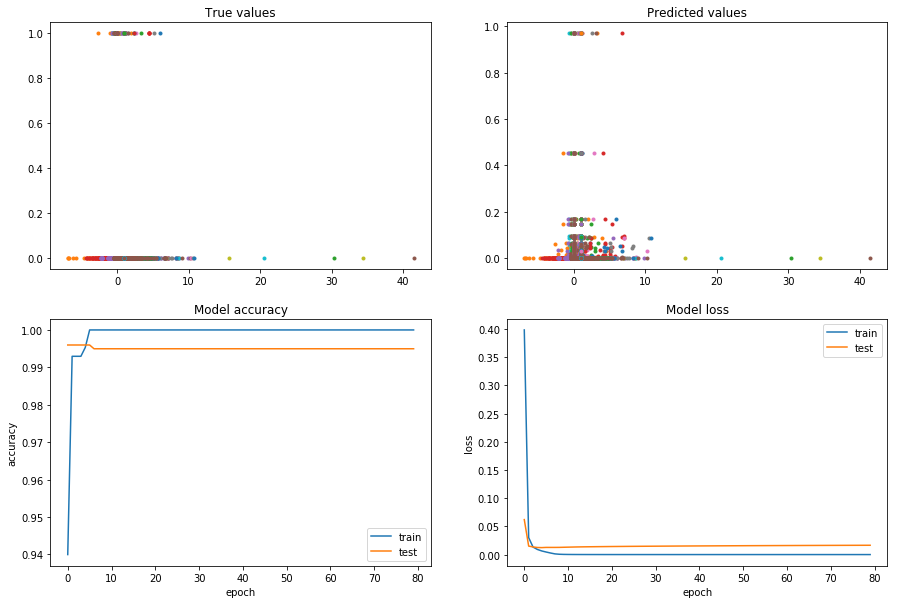

In [49]:
# true values plot
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.plot(X_test,y_test, ls='', marker='.');
plt.title('True values');

# predicted values plotb
plt.subplot(2,2,2)
plt.plot(X_test,y_pred, ls='', marker='.');
plt.title('Predicted values');

# Visualize accuracy performance
plt.subplot(2,2,3)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')


# Visualize loss performance (MSE)
plt.subplot(2,2,4)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()


In [48]:
rounded = [int(round(x[0])) for x in y_pred]
print('Prediction:',collections.Counter(rounded))
print('Test data:',collections.Counter(y_test))



Prediction: Counter({0: 993, 1: 1})
Test data: Counter({0: 990, 1: 4})


## Explain how a new observation is classified

## Performance evaluation

In [38]:
X_train.shape[1]

11776